# Importing libraries and reading dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('trainproject.csv');
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### Dropping Gender and Married Columns

In [5]:
data.drop(['Gender','Married'],axis=1,inplace=True)
data.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###### Checking null values

In [6]:
data.isnull().sum()

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### Removing null values

In [7]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [8]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [9]:
data.isnull().sum()

Loan_ID              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###### Converting Categorical values to numeric values using Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
columns = ['Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in columns:
    data[i] = le.fit_transform(data[i])
data.head() 

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [12]:
data.set_index('Loan_ID',inplace=True)
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,
LP001002,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
LP001003,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
LP001005,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
LP001006,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
LP001008,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Splitting the dataset into train and test

In [13]:
x=data[['Dependents','Education','Self_Employed','Credit_History','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].values
y=data['Loan_Status'].values

In [14]:
print(x)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.46412162e+02 3.60000000e+02]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.50800000e+03
  1.28000000e+02 3.60000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  6.60000000e+01 3.60000000e+02]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.40000000e+02
  2.53000000e+02 3.60000000e+02]
 [2.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.87000000e+02 3.60000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.33000000e+02 3.60000000e+02]]


In [15]:
print(y)

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [17]:
print(x_train)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.33300000e+03
  1.81000000e+02 3.60000000e+02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.79200000e+03
  1.55000000e+02 3.60000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.20900000e+03
  1.34000000e+02 3.60000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.00000000e+01 3.60000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.46412162e+02 2.40000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.46412162e+02 3.60000000e+02]]


In [18]:
print(x_test)

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.280e+02 3.600e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.300e+02 3.600e+02]
 [2.000e+00 0.000e+00 0.000e+00 ... 1.447e+03 1.580e+02 3.600e+02]
 ...
 [2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.870e+02 1.800e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 2.416e+03 1.390e+02 3.600e+02]
 [0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 1.050e+02 3.600e+02]]


In [19]:
print(y_train)

[0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]


In [20]:
print(y_test)

[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0]


### Standardize bigger values of ApplicantIncome,CoapplicantIncome,LoanAmount and Loan_Amount_Term

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,5:]=sc.fit_transform(x_train[:,5:])

In [22]:
print(x_train)

[[ 0.          1.          0.         ...  0.27865737  0.40368493
   0.30437507]
 [ 0.          1.          0.         ...  0.45103751  0.09632945
   0.30437507]
 [ 0.          0.          0.         ...  0.23208844 -0.15191921
   0.30437507]
 ...
 [ 0.          0.          0.         ... -0.59751445 -1.38134113
   0.30437507]
 [ 0.          0.          0.         ... -0.59751445 -0.00519051
  -1.45542149]
 [ 0.          0.          0.         ... -0.59751445 -0.00519051
   0.30437507]]


In [23]:
x_test[:,5:]=sc.fit_transform(x_test[:,5:])
print(x_test)

[[ 0.          0.          0.         ... -0.4897835   1.00133607
   0.19048232]
 [ 0.          0.          0.         ... -0.4897835  -0.18660311
   0.19048232]
 [ 2.          0.          0.         ... -0.07075971  0.15280809
   0.19048232]
 ...
 [ 2.          0.          0.         ... -0.4897835   0.50434111
  -3.15501405]
 [ 0.          0.          0.         ...  0.20984434 -0.07750665
   0.19048232]
 [ 0.          0.          1.         ... -0.4897835  -0.48964881
   0.19048232]]


# Model Fitting

### Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [26]:
logistic_predicted=logistic.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,logistic_predicted)

0.7837837837837838

In [28]:
confusion_matrix(y_test,logistic_predicted)

array([[ 27,  38],
       [  2, 118]], dtype=int64)

In [29]:
logistic_df=pd.DataFrame({'Actual':y_test, 'Predicted':logistic_predicted})
logistic_df

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
180,1,1
181,1,1
182,1,1
183,1,1


C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


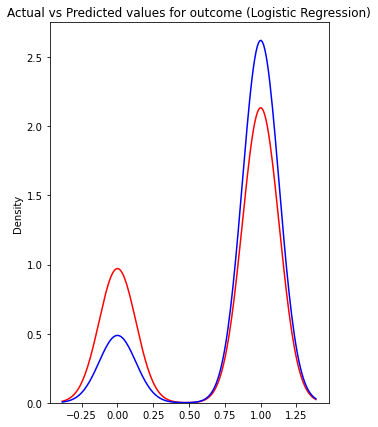

In [46]:
plt.figure(figsize=(5,7))

ax=sns.distplot(y,hist=False,color="r",label="Actual value")
sns.distplot(logistic_predicted,hist=False,color="b",label="Predicted value",ax=ax)

plt.title('Actual vs Predicted values for outcome (Logistic Regression)')

plt.show()
plt.close()

### Decision Tree

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3,min_samples_leaf=5)
decision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [33]:
decision_predict=decision.predict(x_test)

In [34]:
accuracy_score(y_test,decision_predict)

0.7513513513513513

In [35]:
confusion_matrix(y_test,decision_predict)

array([[ 25,  40],
       [  6, 114]], dtype=int64)

C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


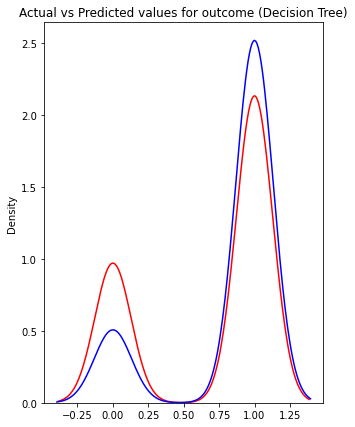

In [47]:
plt.figure(figsize=(5,7))

ax=sns.distplot(y,hist=False,color="r",label="Actual value")
sns.distplot(decision_predict,hist=False,color="b",label="Predicted value",ax=ax)

plt.title('Actual vs Predicted values for outcome (Decision Tree)')

plt.show()
plt.close()

### Random Forest

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=50,random_state=0)
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [40]:
print('Accuracy on the training subset:',random_forest.score(x_train,y_train))
print('Accuracy on the testing subset:',random_forest.score(x_test,y_test))

Accuracy on the training subset: 1.0
Accuracy on the testing subset: 0.7783783783783784


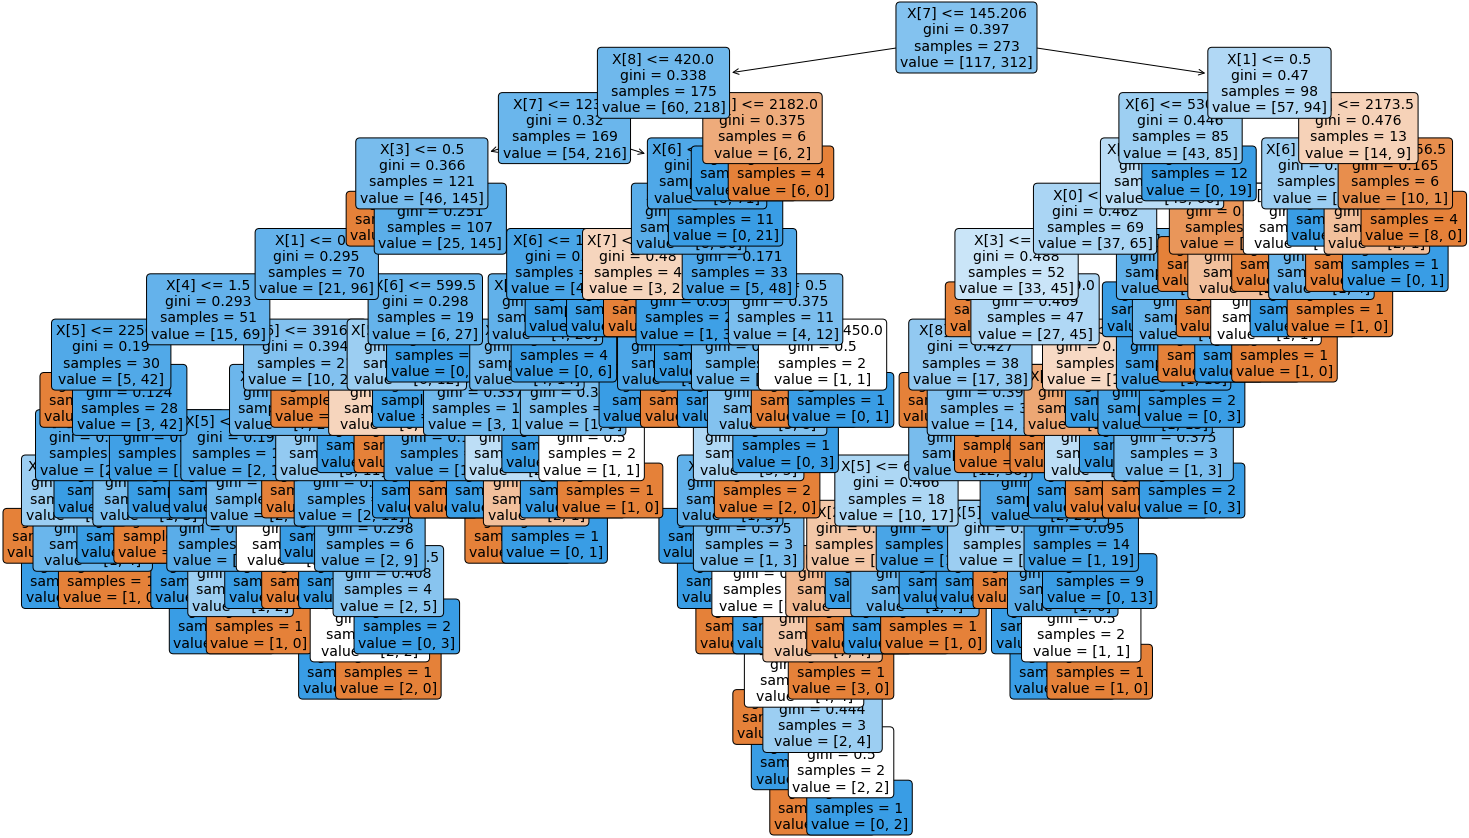

In [41]:
from sklearn.tree import export_graphviz
import pydot

Tree=random_forest.estimators_[5]

from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              rounded=True,
              fontsize=14)
plt.show()
plt.close()

### Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naiveBayes_pred = naive_bayes.predict(x_test)

In [45]:
from sklearn import metrics
metrics.accuracy_score(y_test, naiveBayes_pred)

0.7837837837837838

C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


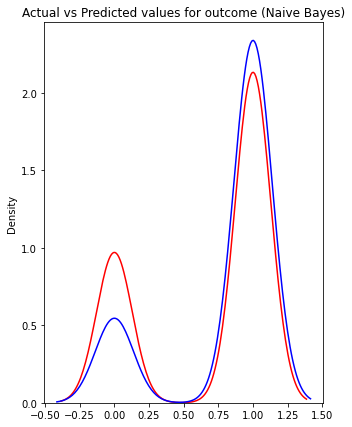

In [48]:
plt.figure(figsize=(5,7))

ax=sns.distplot(y,hist=False,color="r",label="Actual value")
sns.distplot(naiveBayes_pred,hist=False,color="b",label="Predicted value",ax=ax)

plt.title('Actual vs Predicted values for outcome (Naive Bayes)')

plt.show()
plt.close()